# Student Grade Prediction using Random Forest Regressor

# Import libraries 

In [13]:
import pandas as pd  #data processing
import numpy as np #linear algebra
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #statistical data visualization
import sklearn as sk #machine learning model

# Import dataset

In [14]:
df = pd.read_csv('/data/student-mat.csv')

# Exploratory data analysis

In [15]:
df.shape #view dimensions of dataset

(395, 33)

In [16]:
df.head() #preview the dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


#### Descriptive statistics

In [17]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


#### Missing values

Text(0.5, 1.0, 'Missing values in the dataset')

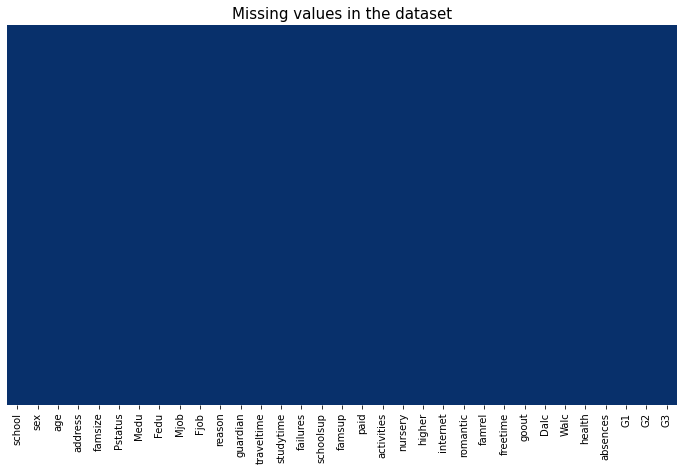

In [18]:
plt.figure(figsize=(12,7))
sns.heatmap(df.isnull(),cbar=False,cmap='Blues_r',yticklabels=False, fmt='.1g')
plt.title('Missing values in the dataset', size=15)

#SAVE FIGURE
#from google.colab import files
#plt.savefig("missingvalue.png")
#files.download("missingvalue.png") 

#### Outliers (numerical features)

Text(0.5, 1.0, 'Outliers in the dataset')

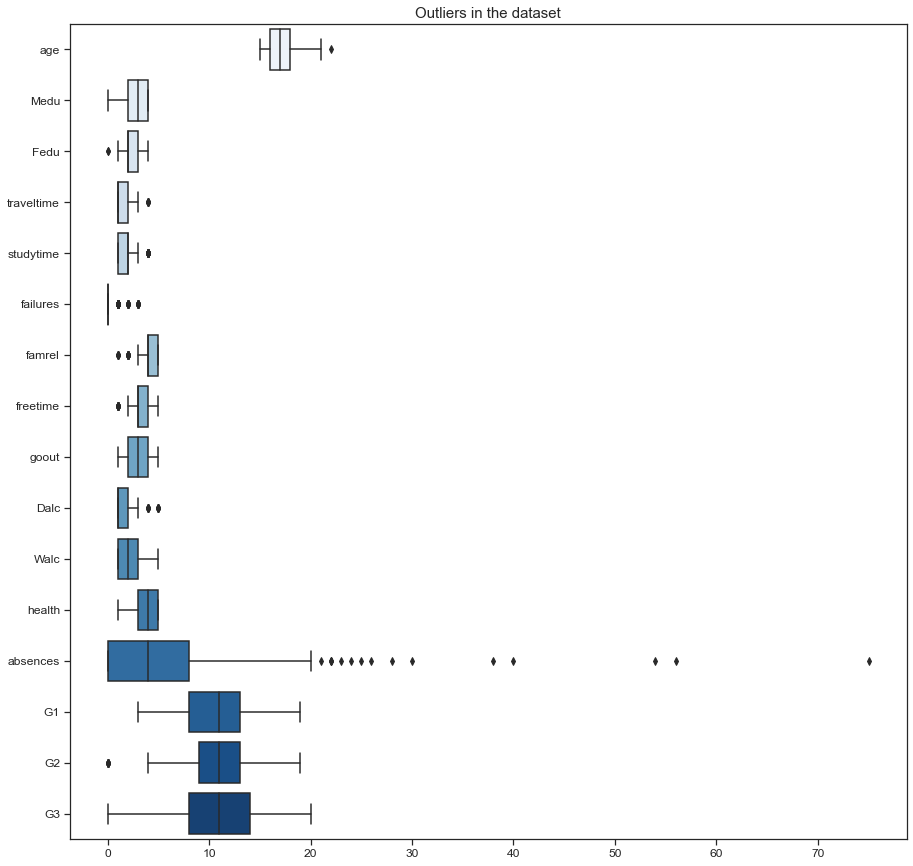

In [19]:
plt.figure(figsize=(15,15))
sns.set_theme(style="ticks", font_scale=1.1)
sns.boxplot(data=df, orient='h', palette = 'Blues')
plt.title('Outliers in the dataset', size=15)

# Exploratory graph analysis

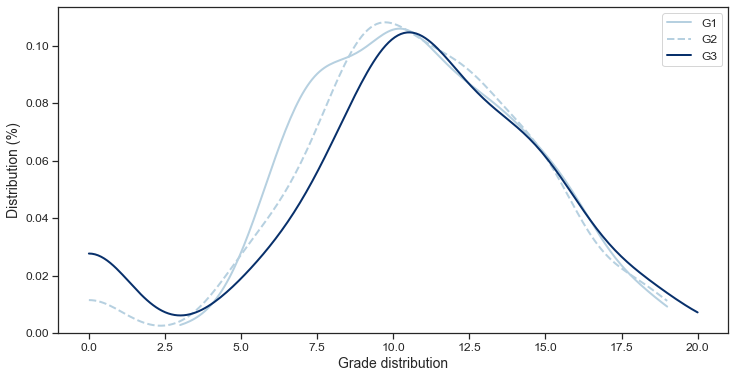

In [20]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.kdeplot(df['G1'], color='#B6D0E0', linewidth=2, label='G1', cut=0)
sns.kdeplot(df['G2'], color='#B6D0E0', linewidth=2, linestyle='dashed', label='G2', cut=0)
sns.kdeplot(df['G3'], color='#08306B', linewidth=2, label='G3', cut=0)

plt.xlabel('Grade distribution', fontsize = 14)
plt.ylabel('Distribution (%)', fontsize = 14)
plt.legend()
plt.show()

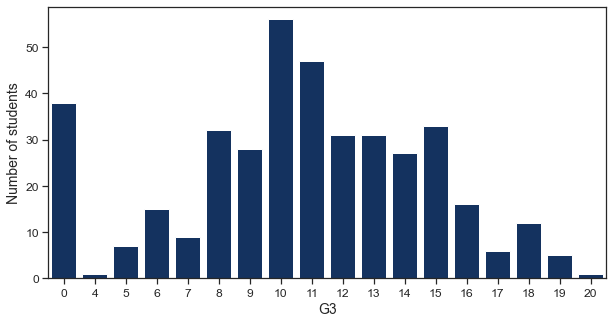

In [21]:
plt.figure(figsize=(10,5))
b = sns.countplot(x=df['G3'], color='#08306B')
b.set_xlabel('G3', fontsize = 14)
b.set_ylabel('Number of students', fontsize = 14)
plt.show()

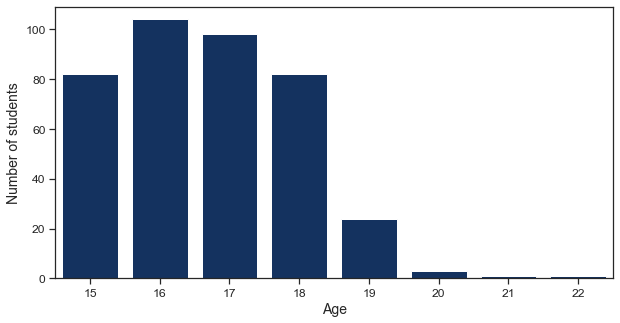

In [22]:
plt.figure(figsize=(10,5))
b = sns.countplot(x=df['age'], color='#08306B')
b.set_xlabel('Age', fontsize = 14)
b.set_ylabel('Number of students', fontsize = 14)
plt.show()

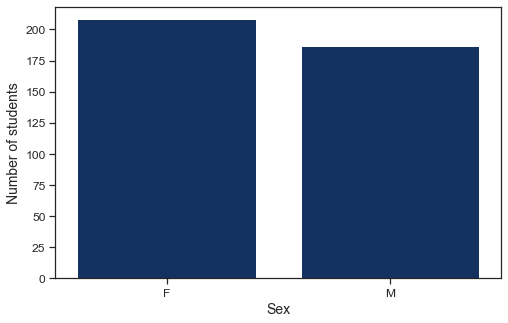

In [23]:
plt.figure(figsize=(8,5))
b = sns.countplot(x=df['sex'], color='#08306B')
b.set_xlabel('Sex', fontsize = 14)
b.set_ylabel('Number of students', fontsize = 14)
plt.show()

Text(0.5, 0, 'Sex')

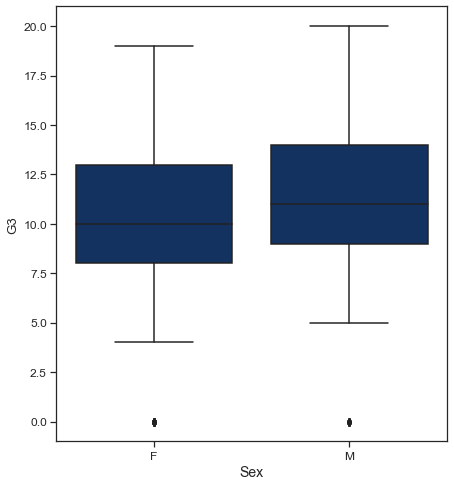

In [24]:
plt.figure(figsize=(7,8))
b = sns.boxplot(x='sex', y='G3', data=df, color="#08306B")
#b.axes.set_title('Sexo vs Nota final (G3)', fontsize = 20)
b.set_xlabel('Sex', fontsize = 14)

## Feature Engineering



In [25]:
df.dtypes #check data types

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [26]:
categorical = ['school',\
               'sex',\
               'address',\
               'famsize',\
               'Pstatus',\
               'Mjob',\
               'Fjob',\
               'reason',\
               'guardian',\
               'schoolsup',\
               'famsup',\
               'paid',\
               'activities',\
               'nursery',\
               'higher',\
               'internet',\
               'romantic',
                ]

In [27]:
#transform non-numerical labels to numerical labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df[categorical] = df[categorical].apply(lambda col: le.fit_transform(col))
df[categorical].head()

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,0,0,1,0,0,0,4,0,1,1,0,0,0,1,1,0,0
1,0,0,1,0,1,0,2,0,0,0,1,0,0,0,1,1,0
2,0,0,1,1,1,0,2,2,1,1,0,1,0,1,1,1,0
3,0,0,1,0,1,1,3,1,1,0,1,1,1,1,1,1,1
4,0,0,1,0,1,2,2,1,0,0,1,1,0,1,1,0,0


# Feature selection

#### Correlation matrix (Spearman)

Text(0.5, 1.0, 'Correlation Matrix (Spearman)')

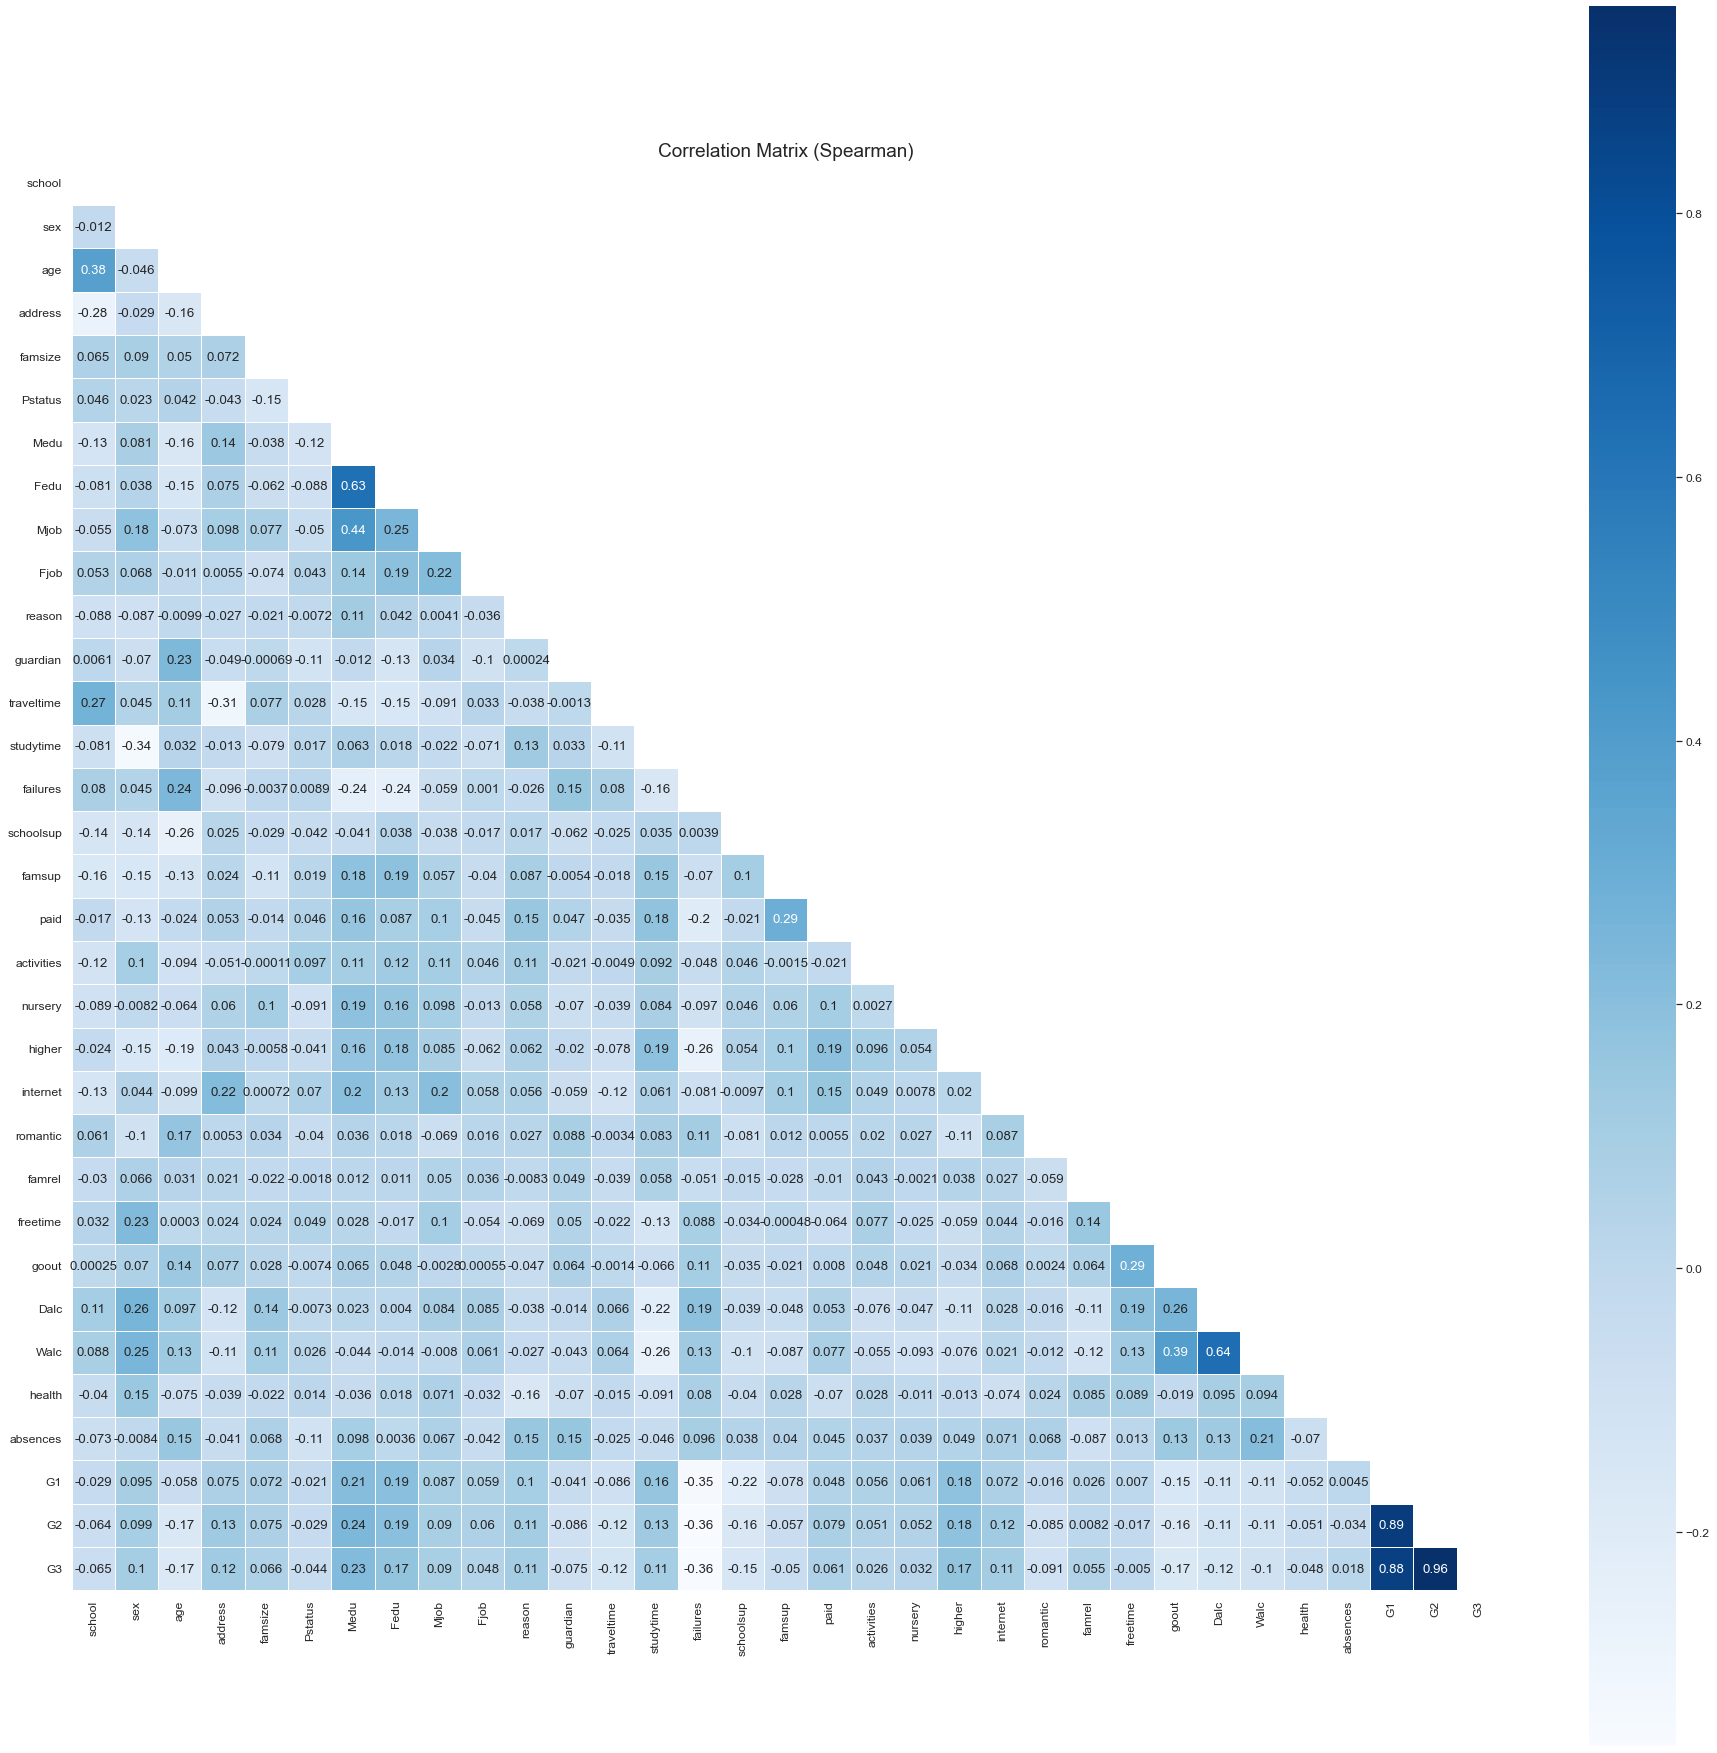

In [28]:
corr = df.corr(method='spearman') 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(32, 32))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.6,cmap="Blues",annot=True)
plt.title('Correlation Matrix (Spearman)', size=19)

In [29]:
most_correlated = df.corr().abs()['G3'].sort_values(ascending=False)
most_correlated

G3            1.000000
G2            0.904868
G1            0.801468
failures      0.360415
Medu          0.217147
higher        0.182465
age           0.161579
Fedu          0.152457
goout         0.132791
romantic      0.129970
reason        0.121994
traveltime    0.117142
address       0.105756
sex           0.103456
Mjob          0.102082
paid          0.101996
internet      0.098483
studytime     0.097820
schoolsup     0.082788
famsize       0.081407
guardian      0.070109
health        0.061335
Pstatus       0.058009
Dalc          0.054660
Walc          0.051939
nursery       0.051568
famrel        0.051363
school        0.045017
Fjob          0.042286
famsup        0.039157
absences      0.034247
activities    0.016100
freetime      0.011307
Name: G3, dtype: float64

#### Chi-2

In [30]:
X = df.drop('G3', axis=1)
y = df['G3']

In [31]:
from sklearn.feature_selection import SelectKBest, chi2

chi_scores = chi2(X, y)
chi_scores

(array([ 10.31067797,  10.58166219,   2.27776186,   5.87611299,
         12.4296898 ,   1.71114959,  13.89485215,  10.37556313,
         14.80709871,   5.01367018,  29.72412494,   4.29716283,
          6.75815116,   6.23160348, 140.93489812,  28.31901793,
          5.30343831,  16.1298998 ,   7.60104871,   3.2970835 ,
          1.23447862,   2.99914225,  20.08952572,   2.11068612,
          4.47946459,  10.47249433,  17.08286838,  28.44416652,
         10.17666783, 648.1668477 , 319.71642692, 451.68095212]),
 array([8.90079031e-001, 8.77466915e-001, 9.99990805e-001, 9.93980135e-001,
        7.73448893e-001, 9.99998961e-001, 6.74530494e-001, 8.87127131e-001,
        6.09373865e-001, 9.97731993e-001, 2.84046225e-002, 9.99164900e-001,
        9.86469683e-001, 9.91489433e-001, 1.43606828e-021, 4.13458713e-002,
        9.96775132e-001, 5.14645536e-001, 9.74350267e-001, 9.99863897e-001,
        9.99999920e-001, 9.99930641e-001, 2.69675820e-001, 9.99994819e-001,
        9.98901989e-001, 8.826

In [32]:
p_values = pd.Series(chi_scores[1],index = X.columns)
p_values.sort_values(ascending = True , inplace = True)
p_values

absences      8.815070e-127
G2             2.751988e-85
G1             9.462563e-58
failures       1.436068e-21
reason         2.840462e-02
Walc           4.000841e-02
schoolsup      4.134587e-02
romantic       2.696758e-01
Dalc           4.487655e-01
paid           5.146455e-01
Mjob           6.093739e-01
Medu           6.745305e-01
famsize        7.734489e-01
sex            8.774669e-01
goout          8.826373e-01
Fedu           8.871271e-01
school         8.900790e-01
health         8.960386e-01
activities     9.743503e-01
traveltime     9.864697e-01
studytime      9.914894e-01
address        9.939801e-01
famsup         9.967751e-01
Fjob           9.977320e-01
freetime       9.989020e-01
guardian       9.991649e-01
nursery        9.998639e-01
internet       9.999306e-01
age            9.999908e-01
famrel         9.999948e-01
Pstatus        9.999990e-01
higher         9.999999e-01
dtype: float64

Text(0.5, 1.0, 'Chi-square test for feature selection')

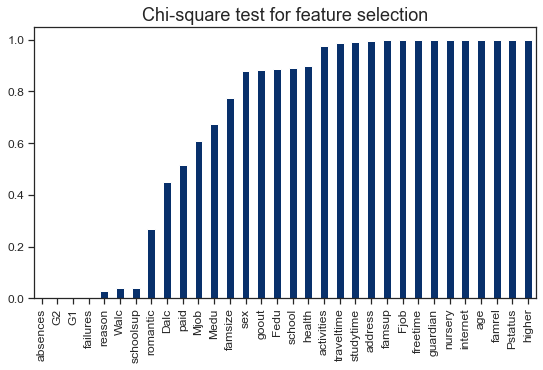

In [33]:
p_values.plot.bar(figsize = (9,5), cmap="Blues_r")
plt.title('Chi-square test for feature selection', size=18) 


c:\Users\dePaulaM\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


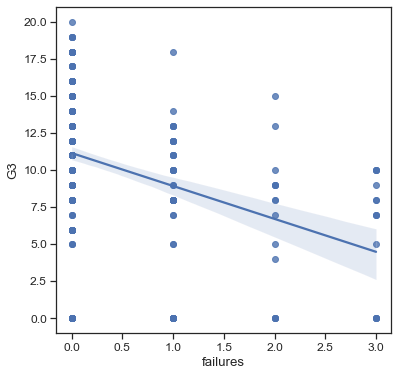

In [34]:
plt.figure(figsize=(6,6))
sns.regplot('failures', 'G3', data=df)
plt.show()

# Train test split

In [35]:
from sklearn.model_selection import train_test_split

df2 = df[['G1', 'G2', 'G3', 'absences']]

X = df2.drop('G3', axis=1) #independent variable 
y = df2['G3'] #dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [36]:
X_train.shape, X_test.shape #check the shape of X_train and X_test

((316, 3), (79, 3))

## Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [38]:
y_pred = rf.predict(X_test)

In [39]:
from sklearn.metrics import r2_score

print(r2_score(y_test, y_pred))

0.8609126982274837


In [40]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, y_pred))

3.151382630098453


c:\Users\dePaulaM\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


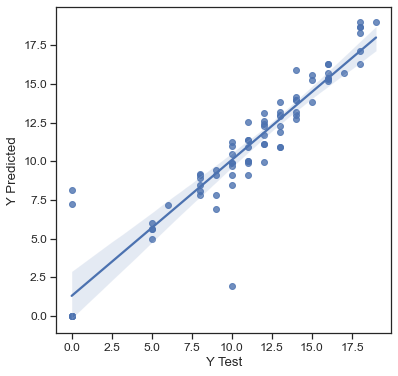

In [41]:
plt.figure(figsize=(6,6))

sns.regplot(y_test, y_pred)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')
plt.show()

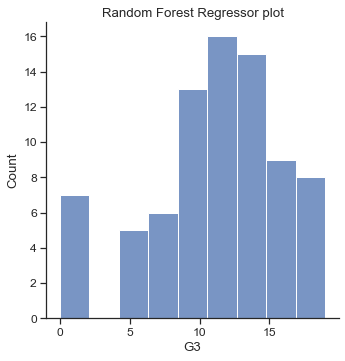

In [42]:
sns.displot(y_test)
plt.title("Random Forest Regressor plot")
plt.show()